In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [20]:
import nengo_bio as bio
import nengo as nengo
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
import matplotlib.patches
import numpy as np
import json
import os
import multiprocessing
from tqdm import tqdm
import scipy.stats
import scipy.optimize

In [18]:
# Plot the original histogram
orig_bins = np.linspace(-90,-30, 16)[:-1]
orig_qty = np.array([0, 2, 4, 4, 6, 15, 12, 12, 8, 3, 5, 1, 3, 0, 0])
orig_qty_density = orig_qty / (np.sum(orig_qty) * 4)

orig_Js, orig_Gs = np.array([5.7789,-0.0357,
8.392,1.6794,
10.9045,5.0251,
13.4171,9.3899,
15.8543,13.302,
18.392,16.9873,
20.9799,19.4045,]).reshape(-1, 2).T
orig_Gs /= 0.2 # spike count measured over a 250ms interval

In [34]:
p_mu, p_sigma = scipy.optimize.curve_fit(scipy.stats.norm.pdf, orig_bins + 2, orig_qty_density, p0=(-64, 10))[0]
ps = np.linspace(-90, -30, 100)
ps_density = scipy.stats.norm.pdf(ps, p_mu, p_sigma)

(-90.0, -30.0)

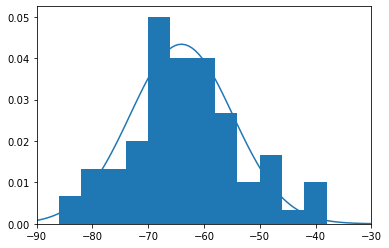

In [35]:
fig, ax = plt.subplots()
ax.bar(orig_bins + 2, orig_qty_density, width=4)
ax.plot(ps, ps_density)
ax.set_xlim(-90, -30)

Signature: scipy.stats.norm.fit(data, **kwds)
Docstring:
Return MLEs for shape (if applicable), location, and scale
parameters from data.

MLE stands for Maximum Likelihood Estimate.  Starting estimates for
the fit are given by input arguments; for any arguments not provided
with starting estimates, ``self._fitstart(data)`` is called to generate
such.

One can hold some parameters fixed to specific values by passing in
keyword arguments ``f0``, ``f1``, ..., ``fn`` (for shape parameters)
and ``floc`` and ``fscale`` (for location and scale parameters,
respectively).

Parameters
----------
data : array_like
    Data to use in calculating the MLEs.
arg1, arg2, arg3,... : floats, optional
    Starting value(s) for any shape-characterizing arguments (those not
    provided will be determined by a call to ``_fitstart(data)``).
    No default value.
kwds : floats, optional
    - `loc`: initial guess of the distribution's location parameter.
    - `scale`: initial guess of the distribution's sc